In [13]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform,randint
from sklearn.linear_model import LogisticRegressionCV


from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer,matthews_corrcoef,recall_score 

In [53]:
def cross_val(model, X, Y):
    sensitivity_scorer = make_scorer(recall_score)
    specificity_scorer = make_scorer(recall_score, pos_label=0)
    MCC=make_scorer(matthews_corrcoef)


    scoring = {'AUC': 'roc_auc', 'Accuracy': "accuracy", "f1": "f1",
                        "Recall": "recall", "Precision": "precision","MCC":MCC, "Average Precision": "average_precision",
                        "Sensitivity": sensitivity_scorer, "Specificity": specificity_scorer}

    scores=cross_validate(model, X, Y, scoring=scoring,)

    mean_scores = {metric: values.mean() for metric, values in scores.items()}

    #mean_scores_df = pd.DataFrame(list(mean_scores.items()), columns=['Metric', 'Mean Score'])

    return mean_scores


def dataset_creator(score_n,sydromic):
    sfari=pd.read_csv('sfari_ed_01_16_2024.csv')
    sfari_score=sfari[sfari['gene-score'] <= score_n]

    emb=pd.read_csv('final_dataset_less_krs.csv',header=None)

    emb_dataset=pd.merge(emb,sfari,left_on=1,right_on='ensembl-id')
    emb_dataset=emb_dataset[[0,1,2,3,4]]

    negative_dataset=pd.read_csv('final_dataset_less_krs.csv',header=None)
    negative_dataset=negative_dataset[negative_dataset[4] ==0]

    


# ML classification


## Datasets

In [54]:
complete = pd.read_csv('gene_lists/complete.csv.gz',compression = 'gzip')
cat_1_2_3 = pd.read_csv('gene_lists/cat_1_2_3.csv.gz',compression = 'gzip')
cat_1_2 = pd.read_csv('gene_lists/cat_1_2.csv.gz',compression = 'gzip')
cat_1_2_sd = pd.read_csv('gene_lists/cat_1_2_sd.csv.gz',compression = 'gzip')
cat_1 = pd.read_csv('gene_lists/cat_1.csv.gz',compression = 'gzip')
cat_1_sd = pd.read_csv('gene_lists/cat_1_sd.csv.gz',compression = 'gzip')


## Logistic regression results

In [55]:
def lr_results(datasets):
    results_list = []
    MCC=make_scorer(matthews_corrcoef)

    for dataset,name in datasets:

        x = dataset["3"].copy()
        x = x.str.split(expand=True)
        x= x.astype(float)

        y = dataset["4"].copy().astype('category')

        lr = LogisticRegressionCV(max_iter=10000, class_weight='balanced', scoring=MCC)

        lr_scores = cross_val(lr, x, y)

        result_entry = {'dataset_name': name, **lr_scores}

        results_list.append(result_entry)

    results_df = pd.DataFrame(results_list)
    results_df.set_index('dataset_name', inplace=True)


    return results_df


In [56]:
results_lr=lr_results([(cat_1,"Cat 1"),(cat_1_sd,"Cat 1 and SD"),
                   (cat_1_2,"Cat 1 and 2"),(cat_1_2_sd,"Cat 1 and 2 and SD"),
                   (cat_1_2_3,"Cat 1 and 2 and 3"),(complete,"Complete")])

<Axes: ylabel='dataset_name'>

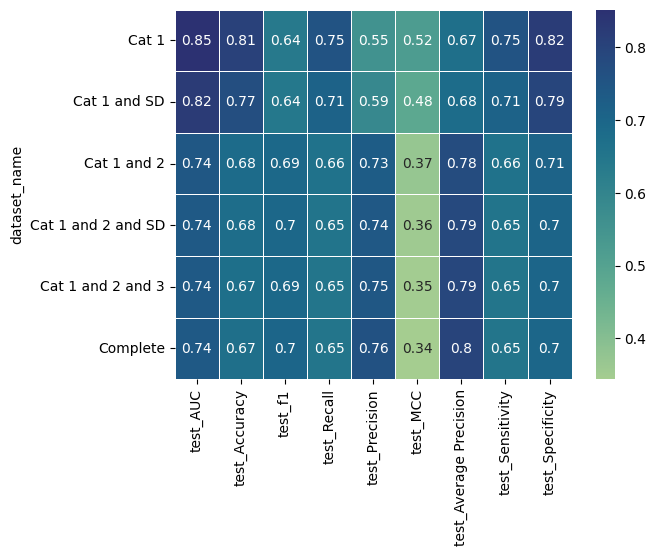

In [59]:
results_lr=results_lr.drop(columns=['fit_time','score_time'])
sns.heatmap(results_lr, cmap="crest", annot=True, linewidths=.5)

In [60]:
import plotly.express as px
fig = px.imshow(results_lr, color_continuous_scale='greens',title='Logistic Regression',width=1000, height=600)
fig.show()  

## LightGBM


In [ ]:
def lr_results(datasets):
    results_list = []
    MCC=make_scorer(matthews_corrcoef)

    for dataset,name in datasets:

        x = dataset["3"].copy()
        x = x.str.split(expand=True)
        x= x.astype(float)

        y = dataset["4"].copy().astype('category')

        lr = LogisticRegressionCV(max_iter=10000, class_weight='balanced', scoring=MCC)
        lr_scores = cross_val(lr, x, y)

        result_entry = {'dataset_name': name, **lr_scores}

        results_list.append(result_entry)

    results_df = pd.DataFrame(results_list)

    return results_df